## 載入 boston 資料
- 載入 boston 資料，切分為訓練和測試資料
- 利用 LSTAT 來預測 MEDV，使用 sklearn 建立線性迴歸模型
- 畫出訓練資料散佈點與迴歸線
- 加入二次項與三次項建立迴歸模型，並將迴歸線加入圖中
- 利用測試資料計算三個模型的 R2R2 與 RMSE

In [164]:
import numpy as np
import pandas as pd

In [165]:
#loading boston data
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
boston = load_boston()

In [166]:
bos = pd.DataFrame(boston.data)

In [167]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [168]:
X = bos[['LSTAT']]
Y = pd.DataFrame(boston.target)

In [169]:
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [170]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [171]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(354, 1) (354, 1) (152, 1) (152, 1)


In [172]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [173]:
# create quadratic terms (二次項)
quadratic = PolynomialFeatures(degree = 2)
X_train_quad = quadratic.fit_transform(X_train)

# create triple terms (三次項)
triple = PolynomialFeatures(degree = 3)
X_train_triple = triple.fit_transform(X_train)

In [174]:
# fit linear model
lm = LinearRegression()
lm.fit(X_train, y_train)
X_fit = np.linspace(np.min(X_train) * 0.8, np.max(X_train) * 1.2, 50).reshape(-1, 1) #加入二次方的X軸 
y_lin_fit = lm.predict(X_fit)

# fit quadratic model
quad = LinearRegression()
quad.fit(X_train_quad, y_train)
y_quad_fit = quad.predict(quadratic.fit_transform(X_fit))

In [175]:
# fit triple model
tri = LinearRegression()
tri.fit(X_train_triple, y_train)
y_triple_fit = tri.predict(triple.fit_transform(X_fit))

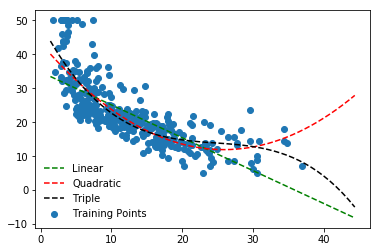

In [176]:
# plotting
plt.scatter(X_train, y_train, label = "Training Points")
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "g")
plt.plot(X_fit , y_quad_fit, label = "Quadratic", c = "r", linestyle = "--")
plt.plot(X_fit , y_triple_fit, label = "Triple", c = "black", linestyle = "--")
plt.legend(loc = "lower left", frameon = False)
plt.show()

In [177]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_lin_hat = lm.predict(X_test)
y_quad_hat = quad.predict(quadratic.fit_transform(X_test))
y_trip_hat = tri.predict(triple.fit_transform(X_test))
rmse_lin = np.sqrt(mean_squared_error(y_test, y_lin_hat))
rmse_quad = np.sqrt(mean_squared_error(y_test, y_quad_hat))
rmse_triple = np.sqrt(mean_squared_error(y_test, y_trip_hat))
print("RMSE: \n Linear: %.4f \n Quadratic: %.4f \n Triple: %.4f" % (rmse_lin, rmse_quad, rmse_triple))
print("\n")
r_2_lin = r2_score(y_test, y_lin_hat)
r_2_quad = r2_score(y_test, y_quad_hat)
r_2_triple = r2_score(y_test, y_trip_hat)
print("R^2: \n Linear: %.4f \n Quadratic: %.4f \n Triple: %.4f" % (r_2_lin, r_2_quad, r_2_triple))



RMSE: 
 Linear: 6.3101 
 Quadratic: 5.7968 
 Triple: 5.6650


R^2: 
 Linear: 0.5218 
 Quadratic: 0.5964 
 Triple: 0.6146
